# <span style="color:#900C3F"> Laboratorio di Simulazione Numerica</span>

# <span style="color: #C70039 "> Esercitazione 1</span>

### <span style="color: #FF5733 "> Esercizio 01.1</span>

L'esercizio chiedeva di verificare la bontà del generatore di numeri casuali consegnatoci calcolando i due integrali:


1) $\langle r \rangle = \int_0^1 r dr = 1/2$.  

Si richiede di fare un grafico con la stima di $\langle r \rangle$ e la sua incertezza statistica (cioè la deviazione standard della media) in funzione del numero di lanci.

Per calcolare l'incertezza statistica ho fatto uso del metodo dei blocchi; questo consiste nel dividere gli M step Monte Carlo della simulazione, ognuno dei quali genera una stima di r, in N blocchi, con N<M. Ogni blocco contiene M/N stime della grandezza r, con cui si possono calcolare la media del blocco e il suo quadrato: chiamo $\langle r \rangle_i$ la media dell' i-esimo blocco e $\langle r \rangle^2_i$ il suo quadrato. L'idea principale è quella di usare durante la simulazione i risultati dei diversi blocchi per avere una stima sempre più precisa del valor medio (facendo la media dei risutati dei blocchi) e la sua incertezza. Per esempio, arrivati al j-esimo blocco la stima del valor medio di r e della sua incertezza saranno dati da:  

$$ \langle r \rangle \simeq \frac{1}{j} \sum_{i=1}^j \langle r \rangle_i \quad \quad\frac{\sigma}{\sqrt{j-1}} \simeq \sqrt{\frac{1}{j-1} \left[ \frac{1}{j} \sum_{i=1}^j \langle r \rangle^2_i - \left( \frac{1}{j} \sum_{i=1}^j \langle r \rangle_i \right)^2 \right]} $$  

se j=1, cioè alla fine del primo blocco, non si può calcolare con l'ultima relazione l'incertezza statistica, che si sceglie di mettere a zero. È fondamentale che ciascun blocco contenga un numero di stime di r abbastanza grande da evitare che ci sia correlazione tra un blocco e l'altro (questo aspetto non è importante in questo particolare esercizio, ma lo sarà per i successivi).



Si riporta di seguito il risultato ottenuto facendo in totale M=100000 stime dell'integrale divise in N=100 blocchi :


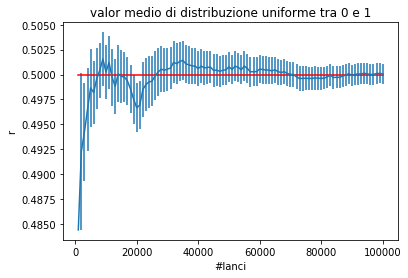

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

n, r, error = np.loadtxt("es01.1/grafico.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(n,r,yerr=error)
g=np.full(n.size, 0.5)
plt.plot(n,g,c="red")
plt.xlabel('#lanci')
plt.ylabel('r')
plt.title('valor medio di distribuzione uniforme tra 0 e 1')

plt.show()


Dal grafico ottenuto si osserva che la stima da me ottenuta dell'integrale (in blu) è compatibile con il valore atteso di $1/2$ (in rosso), entro un $\sigma$.

2) $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

Si richiede di fare un grafico con la stima di $\langle \sigma^2 \rangle$ e la sua incertezza statistica (cioè la deviazione standard della media) in funzione del numero di lanci. Come nel punto precedente, l'incertezza statistica è stata stimata usando il metodo della media a blocchi. Si riporta di seguito il risultato otteunto, facendo ancora 100000 stime dell'integrale divise in 100 blocchi:


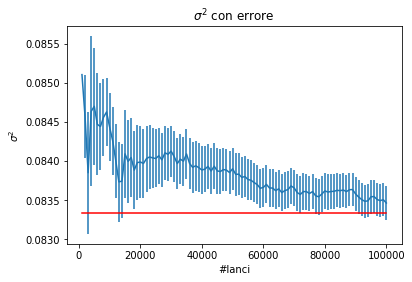

In [2]:
n, s, error = np.loadtxt("es01.1/grafico1.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(n,s,yerr=error)
g=np.full(n.size, 1/12)
plt.plot(n,g,c="red")
plt.xlabel('#lanci')
plt.ylabel(r'$\sigma^2$')
plt.title(r'$\sigma^2$ con errore')

plt.show()


Anche in questo caso ho trovato una stima dell'integrale compatibile con il valore atteso $1/12$.

L'ultima richiesta dell'esercizio era quella di effettuare il test del $\chi^2$ per stimare la probabilità che i numeri casuali generati uniformemente tra 0 e 1 usando il generatore fornitoci non siano effettiamente distribuiti uniformemente tra 0 e 1: se questa probabilità è bassa, abbiamo usato un buon generatore di numeri casuali. In particolare il test del  $\chi^2$ stima l'errore tra il numero di occorrenze osservate in un certo bin, $O_i$, e quelle teoriche $E_i$:  

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$  

Ho suddiviso l'intervallo $[0,1]$ in M=100 sottointervalli uguali e ho ripetuto 100 volte il test usando $10^4$ numeri speudo-casuali. Ho plottato i 100 valori di $\chi^2$ così ottenuti e la retta costante uguale a 100; si riporta di seguito il risultato:

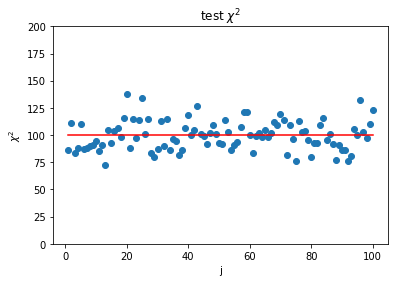

In [3]:
j, c = np.loadtxt("es01.1/grafico2.dat", usecols=(0,1), delimiter=',', unpack='true')
plt.scatter(j, c)
g=np.full(j.size, 100)
plt.ylim(0,200)
plt.plot(j,g,c="red")
plt.title('test $\chi^2$')
plt.xlabel('j')
plt.ylabel('$\chi^2$')
plt.show()

da cui si può evincere che i valori di $\chi^2$ ottenuti sono compatibili con il valore 100 e che il generatore di numeri casuali fornitoci è quindi un buon generatore.

### <span style="color: #FF5733 "> Esercizio 01.2</span>

La prima parte dell'esercizio chiedeva di aggiungere al generatore di numeri casuali la possibilità di estrarre numeri da una distribuzione esponenziale  
( $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ ) e da una ditribuzione di Cauhy-Lorentz ( $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ ), invertendo la distribuzione cumulativa. L'inversa della cumulativa per la distribuzione esponenziale é:  
$$x=\frac{-1}{\lambda}log(1-y),  y\in [0;1]$$  
mentre quella per la distribuzione di Cauchy-Lorentz é:
$$x=\mu+\Gamma tg(\pi\,(y-\frac{1}{2})),  y\in [0;1]$$  
L'esercizio chiedeva poi di realizzare quattro istogrammi rimepiti con $10^4$ realizzazioni della quantità $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ per $N=1, 2, 10, 100$, usando come $x_i$ una variabile estratta prima dalla distribuzione uniforme tra 0 e 1, poi da quella esponenziale (con $\lambda=1$) ed infine da quella di Cauchy-Lorentz (con $\mu=0$ e $\Gamma=1$).  
Gli creare gli istogrammi ho salvato, dal codice in C++ su di un file di output, l'estremo sinistro e le occorrenze di ciascun bin. Ho individuato l'intervallo ottimale in cui realizzare l'istogramma e nel caso della distribuzione uniforme e di quella esponenziale l'ho diviso in 50 bin, mentre gli istogrammi della distribuzione di Cauchy-Lorentz sono stati realizzati utilizzando 100 bin.
Si riportano di seguito i risultati ottenuti:

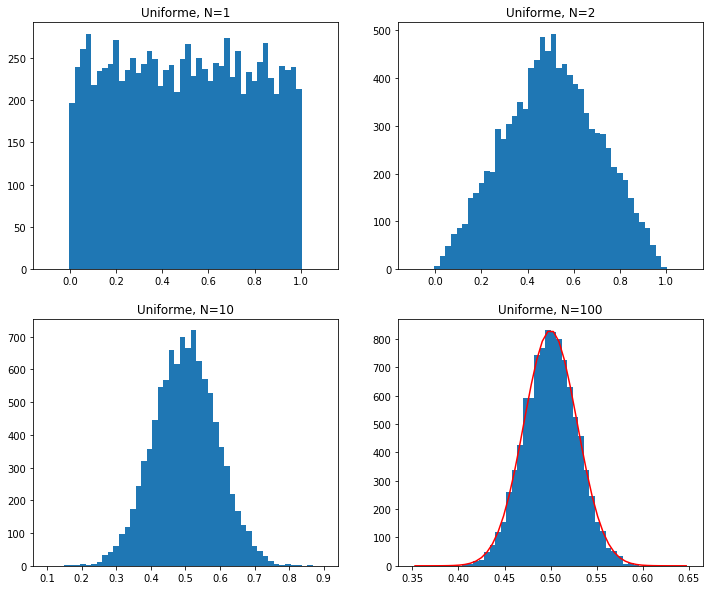

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
def f(x,a,b,c):  # defining the fitting function
    return a * np.exp(-b*(x-c)**2)

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sinistro,occorrenze = np.loadtxt("es01.2/unifN1.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge', width=0.024 )
plt.title('Uniforme, N=1')

plt.subplot(2,2,2)
sinistro,occorrenze = np.loadtxt("es01.2/unifN2.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge',width=0.024)
plt.title('Uniforme, N=2')

plt.subplot(2,2,3)
sinistro,occorrenze = np.loadtxt("es01.2/unifN10.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge',width=0.016)
plt.title('Uniforme, N=10')

plt.subplot(2,2,4)
sinistro,occorrenze = np.loadtxt("es01.2/unifN100.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge',width=0.006)
plt.title('Uniforme, N=100')

p_opt, p_cov = curve_fit(f, sinistro+0.003, occorrenze)    
y_fit =f(sinistro+0.003,p_opt[0],p_opt[1],p_opt[2])
plt.plot(sinistro+0.003,y_fit,label='fit', c='red') # plotting fitted function

plt.show()

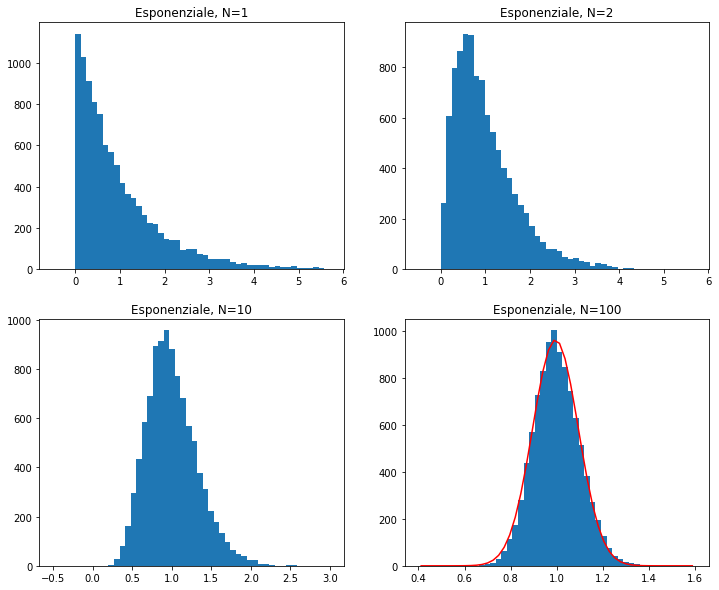

In [13]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sinistro,occorrenze = np.loadtxt("es01.2/expN1.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge', width=0.124 )
plt.title('Esponenziale, N=1')

plt.subplot(2,2,2)
sinistro,occorrenze = np.loadtxt("es01.2/expN2.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge',width=0.124)
plt.title('Esponenziale, N=2')

plt.subplot(2,2,3)
sinistro,occorrenze = np.loadtxt("es01.2/expN10.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge',width=0.07)
plt.title('Esponenziale, N=10')

plt.subplot(2,2,4)
sinistro,occorrenze = np.loadtxt("es01.2/expN100.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge',width=0.024)
plt.title('Esponenziale, N=100')


p_opt, p_cov = curve_fit(f, sinistro+0.012, occorrenze)    
y_fit =f(sinistro+0.012,p_opt[0],p_opt[1],p_opt[2])
plt.plot(sinistro+0.012,y_fit,label='fit', c='red') # plotting fitted function


plt.show()


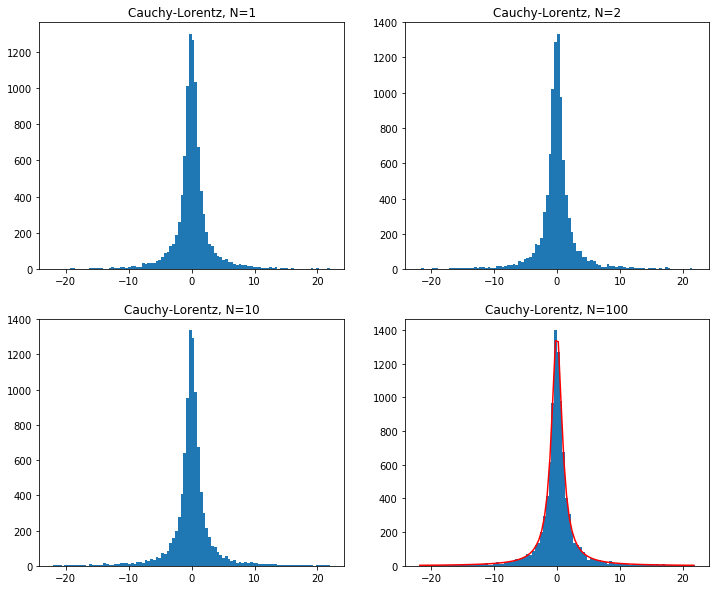

In [14]:
plt.figure(figsize=(12,10))

def lorentz(x, I, gamma, x0):
    return I * gamma**2 / ((x - x0)**2 + gamma**2)

plt.subplot(2,2,1)
sinistro,occorrenze = np.loadtxt("es01.2/LorentzN1.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge', width=0.44 )
plt.title('Cauchy-Lorentz, N=1')

plt.subplot(2,2,2)
sinistro,occorrenze = np.loadtxt("es01.2/LorentzN2.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge',width=0.44)
plt.title('Cauchy-Lorentz, N=2')

plt.subplot(2,2,3)
sinistro,occorrenze = np.loadtxt("es01.2/LorentzN10.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge',width=0.44)
plt.title('Cauchy-Lorentz, N=10')

plt.subplot(2,2,4)
sinistro,occorrenze = np.loadtxt("es01.2/LorentzN100.dat", usecols=(0,1), delimiter='\t', unpack='true')
plt.bar(sinistro,occorrenze,align='edge',width=0.44)
plt.title('Cauchy-Lorentz, N=100')

p_opt, p_cov = curve_fit(lorentz, sinistro+0.22, occorrenze)    
y_fit =lorentz(sinistro+0.22,p_opt[0],p_opt[1],p_opt[2])
plt.plot(sinistro+0.22,y_fit,label='fit', c='red') # plotting fitted function

plt.show()

Un aspetto molto interessante dell'esercizio è il fatto che nel caso della distribuzione uniforme e di quella esponenziale gli istogrammi riportati mostrano un andamento sempre più gaussiano all'aumentare di N; in particolare, ho potuto eseguire un fit con una Gaussiana nel caso N=100. Infatti le grandezze sommate e inserite negli istogrammi rispettano le ipotesi del teorema del limite centrale (sono indipendenti, identicamente distribuite ed estratte da una distribuzione a varianza finita).
Gli ultimi istogrammi invece mantengono il loro andamento Lorentziano al variare di N (ho infatti fittato il caso N=100 con una Lorentiana); infatti le grandezze sommate e inserite negli istogrammi non soddisfano le ipotesi del teorema del limite centrale, in qunto la dstribuzione di Cauchy-Lorentz non è a varianza finita, ma è invece unsa distribuzione stabile (quindi Lorentiane sommate tra loro danno ancora una Lorentziana).

### <span style="color: #FF5733 "> Esercizio 01.3</span>

L'esercizio chiede di simulare l'esperimento di Buffon e fare un grafico con la stima di $\pi$ e la sua incertezza statistica. Ho usato il metodo della media a blocchi, che in questo caso presenta una differenza rispetto a quanto descritto precedentemente. Infatti in questo caso è risultato naturale usare come media del blocco non una media aritmetica di diverse stime di $\pi$ ma una sola stima ottenuta con un numero M/N di lanci (dove M è il numero totale di lanci e N è il numero di blocchi).

Per simulare l'esperimento ho immaginato una griglia di rette orizzontali distanziate ad una distanza d (a cui ho assegnato un valore di 1.6) e dei bastoncini di lunghezza l (a cui ho assegnato valore 1). Per implementare il lancio di un bastoncino ho generato la posizione (pos nell'immagine) dell'estremo inferiore del bastoncino e un angolo tra 0 e $2\pi$ ($\theta$ nell'immagine). Se la quantità  $pos + lsin(\theta)$ è minore di $(int(pos/d))d$ allora il bastoncino interseca la retta immediatamete sotto al suo estremo inferiore, mentre se è maggiore di $(int(pos/d)+1)d$ allora il bastoncino interseca la retta immediatamente sopra al suo estremo inferiore. Si riporta un'immagine per rendere più chiara la condizione di intersezione. Ogni volta che si ha intersezione incremento di uno la variabile $N_{hit}$, che ho prima inizializzata a zero. 

Indicando con $N_{throws}$ il numero totale di bastoncini lanciati e con $N_{hit}$ il numero di questi che intersecano una delle rette orizzontali, si stima $\pi$ tramite:  

$$\pi = \lim_{N_{throws} \to \infty}\frac{2LN_{throws}}{N_{hit}d}$$


<img src="es01.3/imagedef.png" width="400">

Si mostra di seguito il risultato, ottenuto usando 10000 lanci e 100 blocchi.

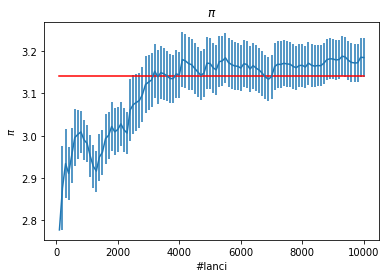

In [15]:
import math

l, p, error = np.loadtxt("es01.3/pi.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(l,p,yerr=error)
g=np.full(l.size, math.pi)
plt.plot(l,g,c="red")
plt.xlabel('#lanci')
plt.ylabel('$\pi$')
plt.title('$\pi$')

plt.show()

Il grafico ottenuto mostra compatibilità tra il valore di $\pi$ (in rosso) e il risultato ottenuto dalla simulazione(in blu). 